# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# source: https://data.boston.gov/dataset/central-library-electricity-usage
path = 'data/bpl_electricity.csv'
df = pd.read_csv(path, parse_dates=['datetime_utc_measured'])
df.columns = ['date', 'kw']
df.set_index('date', inplace=True)
df['kwh'] = df['kw'] * (5/60)

In [3]:
df.head(10)

,kw,kwh
date,,
2021-04-02 03:45:00,1087.2,90.6
2021-04-02 03:40:00,1080.0,90.0
2021-04-02 03:35:00,1072.8,89.4
2021-04-02 03:30:00,1094.4,91.2
2021-04-02 03:25:00,1072.8,89.4
2021-04-02 03:20:00,1065.6,88.8
2021-04-02 03:15:00,1094.4,91.2
2021-04-02 03:10:00,1072.8,89.4
2021-04-02 03:05:00,1065.6,88.8


In [4]:
df.shape

(476118, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476118 entries, 2021-04-02 03:45:00 to 2016-09-21 14:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   kw      476118 non-null  float64
 1   kwh     476118 non-null  float64
dtypes: float64(2)
memory usage: 10.9 MB


In [6]:
df.index.min()

Timestamp('2016-09-21 14:00:00')

In [7]:
df.index.max()

Timestamp('2021-04-02 03:45:00')

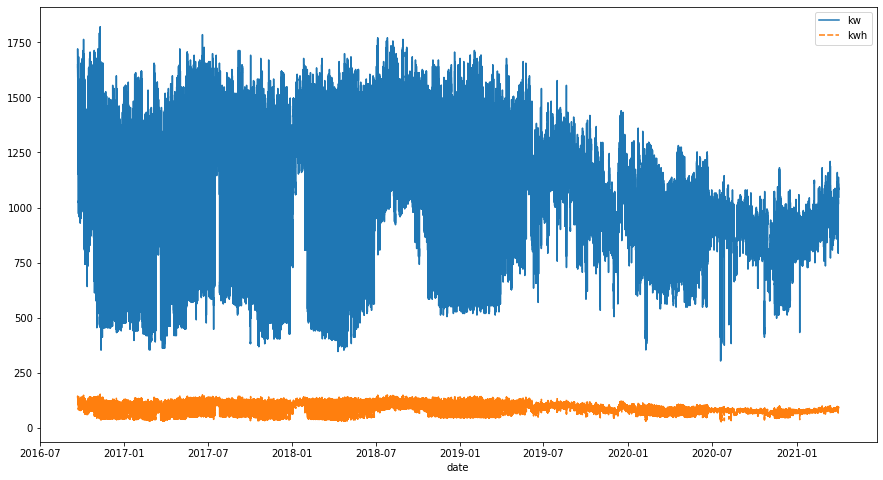

In [8]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df)
plt.show()

In [9]:
kwh_annual_avg = df.resample('Y').agg({'kwh': 'sum'}).loc['2017':'2020'].mean()
int(kwh_annual_avg)

9403295

In [10]:
# average home use https://www.eia.gov/energyexplained/use-of-energy/electricity-use-in-homes.php
int(kwh_annual_avg)/11000

854.845

In [11]:
annual_kwh = dict()
for year in df['2017':'2020'].index.year.unique().sort_values():
    annual_kwh[year] = int(df.resample('Y').agg({'kwh': 'sum'}).loc[str(year), 'kwh'])/1000000
annual_kwh

{2017: 9.305438, 2018: 10.507443, 2019: 9.799695, 2020: 8.000604}

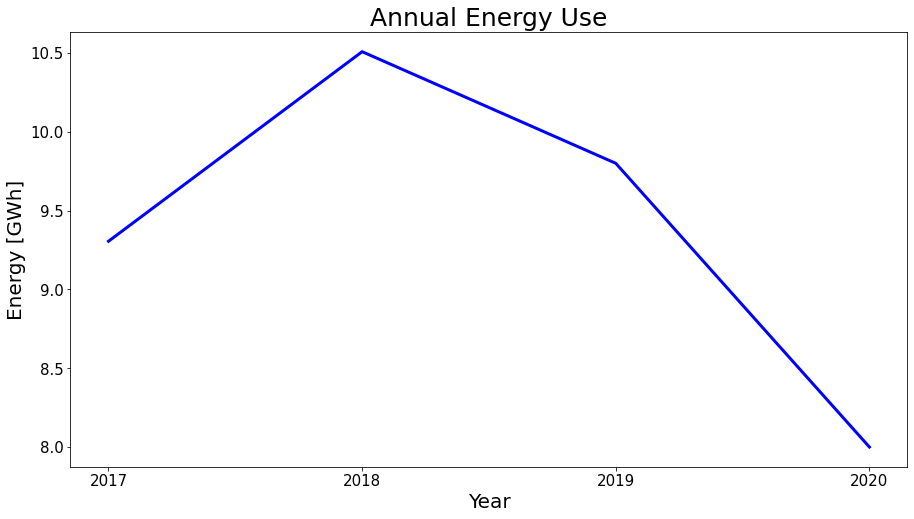

In [12]:
plt.figure(figsize=(15,8))
sns.lineplot(data=annual_kwh, color='blue', linewidth=3)

#design stuff
plt.xticks(np.arange(2017, 2021, 1.0))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Energy [GWh]', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.title('Annual Energy Use', fontsize=25)

plt.savefig('images/annual_energy.png')
plt.show()

In [13]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_kwh = dict()
for day in days_of_week:
    daily_kwh[day] = df[df.index.day_name() == day].mean().loc['kwh'] * (24 / 1000)

In [14]:
daily_hours = pd.DataFrame.from_dict({'Monday': 8, 'Tuesday': 8, 'Wednesday': 10, 'Thursday': 10, \
                                      'Friday': 8, 'Saturday': 8, 'Sunday': 0}, orient='index', columns=['hours'])

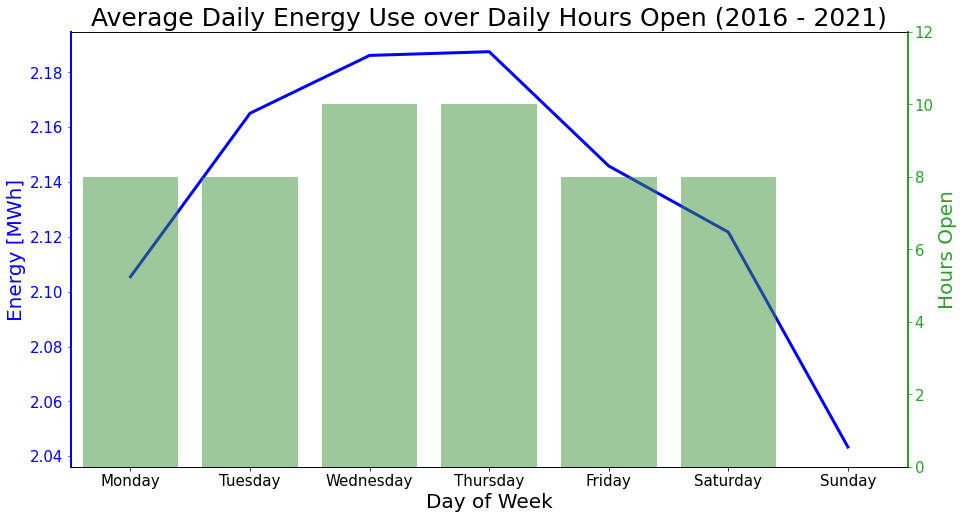

In [15]:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.lineplot(data=daily_kwh, ax=ax1, color='blue', linewidth=3)
ax2 = ax1.twinx()
ax2.set(ylim=(0, 12))
sns.barplot(data=daily_hours, x=daily_hours.index, y='hours', ax=ax2, color='tab:green', alpha=0.5)

#all the design-y stuff
ax1.set_ylabel('Energy [MWh]', fontsize=20)
ax2.set_ylabel('Hours Open', fontsize=20)
ax1.set_xlabel('Day of Week', fontsize=20)
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('tab:green')
ax2.spines['left'].set_color('blue')
ax2.spines['left'].set_linewidth(2)
ax2.spines['right'].set_color('tab:green')
ax2.spines['right'].set_linewidth(2)
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('tab:green')
ax1.tick_params(axis='y', labelcolor='blue', color='blue', labelsize=15)
ax2.tick_params(axis='y', labelcolor='tab:green', color='tab:green', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
plt.title('Average Daily Energy Use over Daily Hours Open (2016 - 2021)', fontsize=25)

plt.savefig('images/daily_energy.png')
plt.show()

In [16]:
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',\
                 'October', 'November', 'December']
monthly_kwh = dict()
for month in months_of_year:
    if month in ['January', 'March', 'May', 'July', 'August','October', 'December']:
        monthly_kwh[month] = df[df.index.month_name() == month].mean().loc['kwh'] * (24 * 31) / 1000
    elif month in ['April','June', 'September', 'November']:
        monthly_kwh[month] = df[df.index.month_name() == month].mean().loc['kwh'] * (24 * 30) / 1000
    else:
        monthly_kwh[month] = df[df.index.month_name() == month].mean().loc['kwh'] * (24 * 28) / 1000

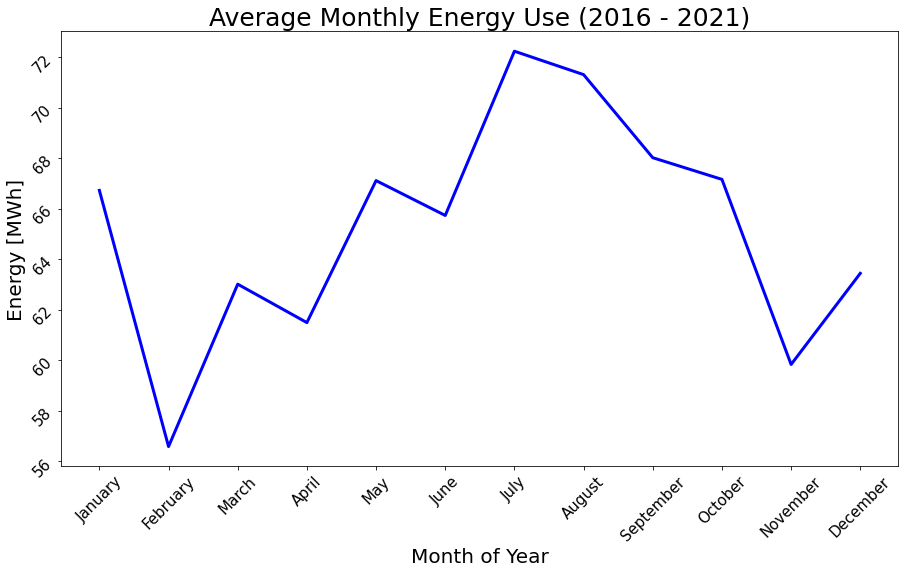

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=monthly_kwh, ax=ax, color='blue', linewidth=3)

ax.set_ylabel('Energy [MWh]', fontsize=20)
ax.set_xlabel('Month of Year', fontsize=20)
ax.tick_params(axis='both', labelsize=15, rotation=45)
plt.title('Average Monthly Energy Use (2016 - 2021)', fontsize=25)

plt.savefig('images/monthly_energy.png')
plt.show()